# Slektstre med NetworkX - Introduksjon

Velkommen til slektstre-prosjektet! Dette er en komplett løsning for å bygge, administrere og visualisere familie-trær ved hjelp av NetworkX og Python.

## Hva er dette prosjektet?

Slektstre-prosjektet lar deg:
- 📊 Bygge komplekse familie-trær med rike metadata
- 🔄 Importere og eksportere data i flere formater (YAML, JSON, CSV, GEDCOM)
- 📈 Visualisere slektstreet på forskjellige måter
- 🌍 Støtte både norsk og engelsk språk
- 🔍 Analysere slektskap og generasjonsforhold

## Hovedkomponenter

1. **Modeller** (`models.py`): Pydantic-modeller for Person, Ekteskap og FamilieData
2. **Slektstre-klasse** (`tree.py`): Hovedklasse med NetworkX som backend
3. **Import/Eksport** (`io.py`): Støtte for flere dataformater
4. **Visualisering** (`visualization.py`): Matplotlib og Plotly visualiseringer
5. **Lokalisering** (`localization.py`): Tospråklig støtte

## Installasjon

Først må du sette opp conda-miljøet:

```bash
conda env create -f environment.yml
conda activate slektstre
```

Eller installere pakkene direkte:

```bash
pip install -r requirements.txt
```


In [1]:
# Importer nødvendige biblioteker
import sys
import os
sys.path.append('../src')

# Importer modulene direkte fra src-mappen
from models import Person, Ekteskap, FamilieData, Gender
from tree import Slektstre
from family_io import load_from_yaml, save_to_yaml
from visualization import plot_hierarchical_tree, plot_interactive_tree, plot_statistics
from localization import t, get_available_languages

# Importer også standardbiblioteker
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import date
import pandas as pd

print("✅ Alle biblioteker importert!")
print(f"Tilgjengelige språk: {get_available_languages()}")


✅ Alle biblioteker importert!
Tilgjengelige språk: ['no', 'en']


## Grunnleggende konsepter

### Person-modellen

En `Person` har følgende hovedattributter:
- **Navn**: fornavn, mellomnavn, etternavn
- **Metadata**: fødselsdato, dødsdato, fødested, kjønn
- **Relasjoner**: foreldre, barn, partnere
- **Media**: bilde_sti, notater, historier

### Ekteskap-modellen

Et `Ekteskap` kobler to personer sammen:
- **Partnere**: referanser til to person-IDer
- **Datoer**: ekteskapsdato, skilsmisse_dato
- **Metadata**: ekteskapssted, type, notater

### Slektstre-klassen

`Slektstre` er hovedklassen som:
- Bruker NetworkX som backend for graf-operasjoner
- Tilbyr metoder for å legge til/fjerne personer og relasjoner
- Beregner slektskap og generasjonsnivåer
- Gir statistikk om familien


In [2]:
# Test: Opprett en enkel person
person = Person(
    fornavn="Arvid",
    etternavn="Lundervold",
    kjønn=Gender.MALE,
    fødselsdato=date(1985, 12, 10),
    fødested="Bergen",
    notater="Forsker i kunstig intelligens"
)

print(f"Person opprettet: {person.fullt_navn}")
print(f"Alder: {person.alder} år")
print(f"Er levende: {person.er_levende}")
print(f"Kjønn: {t(person.kjønn)}")


Person opprettet: Arvid Lundervold
Alder: 39 år
Er levende: True
Kjønn: Mann


## Last eksempeldata

La oss laste inn eksempel-familien som følger med prosjektet:


In [3]:
# Last eksempel-familie
familie_data = load_from_yaml('../data/eksempel_familie.yaml')
slektstre = Slektstre(familie_data)

print(f"Familie lastet med {len(familie_data.personer)} personer og {len(familie_data.ekteskap)} ekteskap")
print(f"Beskrivelse: {familie_data.beskrivelse}")

# Vis noen personer
print("\nFørste 5 personer:")
for person in familie_data.personer[:5]:
    print(f"- {person.fullt_navn} ({person.fødselsdato.year if person.fødselsdato else 'Ukjent år'})")


Familie lastet med 17 personer og 5 ekteskap
Beskrivelse: Eksempel familie med 4 generasjoner - Lundervold familien

Første 5 personer:
- Erik Lundervold (1920)
- Ingrid Marie Hansen (1925)
- Arvid Lundervold (1950)
- Helena Sofia Lundervold (1952)
- Bjørn Lundervold (1955)


## Test visualisering

La oss teste en enkel visualisering:


## Forklaring av visualiseringen

**Kantene (linjene) mellom nodene representerer:**

- **🔴 Røde linjer (tykke)**: Ekteskap/partnerskap mellom to personer
- **⚫ Svarte linjer (tykke)**: Forelder-barn relasjoner
- **⚫ Svarte linjer (tynne, stiplede)**: Andre slektskap (f.eks. søsken)

**Farger på nodene:**
- **🔵 Blå**: Menn
- **🟣 Rosa**: Kvinner
- **🟢 Grønn**: Annet kjønn

**Layout:**
- Personer er arrangert etter generasjoner (vertikalt)
- Eldre generasjoner er øverst
- Årstallene viser fødselsår
- **ID-en (p-nummeret) vises inne i hver node** for lettere identifikasjon


In [4]:
# Vis alle personer med deres p-nummer for lettere identifikasjon
print("👥 Alle personer i slektstreet:")
print("=" * 50)

for person in slektstre.get_all_persons():
    fødselsår = person.fødselsdato.year if person.fødselsdato else "Ukjent"
    print(f"ID: {person.id:3} | {person.fullt_navn:25} | f. {fødselsår} | {t(person.kjønn)}")

print(f"\n📊 Totalt: {len(slektstre.get_all_persons())} personer")


👥 Alle personer i slektstreet:
ID: p1  | Erik Lundervold           | f. 1920 | Mann
ID: p2  | Ingrid Marie Hansen       | f. 1925 | Kvinne
ID: p3  | Arvid Lundervold          | f. 1950 | Mann
ID: p4  | Helena Sofia Lundervold   | f. 1952 | Kvinne
ID: p5  | Bjørn Lundervold          | f. 1955 | Mann
ID: p6  | Kari Lundervold           | f. 1958 | Kvinne
ID: p8  | Anna Kristin Pedersen     | f. 1952 | Kvinne
ID: p7  | Magnus Lundervold         | f. 1980 | Mann
ID: p9  | Erik Arvid Lundervold     | f. 1985 | Mann
ID: p10 | Sofia Lundervold          | f. 1988 | Kvinne
ID: p11 | Lars Andersen             | f. 1983 | Mann
ID: p12 | Marianne Olsen            | f. 1985 | Kvinne
ID: p17 | Ole Andersen              | f. 1950 | Mann
ID: p13 | Emma Lundervold           | f. 2010 | Kvinne
ID: p14 | Noah Lundervold           | f. 2012 | Mann
ID: p15 | Maja Lundervold           | f. 2015 | Kvinne
ID: p16 | Oliver Lundervold         | f. 2018 | Mann

📊 Totalt: 17 personer


In [5]:
# Vis alle ekteskap
print("💒 Alle ekteskap i slektstreet:")
print("=" * 60)

for ekteskap in slektstre.familie_data.ekteskap:
    partner1 = slektstre.get_person(ekteskap.partner1_id)
    partner2 = slektstre.get_person(ekteskap.partner2_id)
    
    if partner1 and partner2:
        ekteskapsår = ekteskap.ekteskapsdato.year if ekteskap.ekteskapsdato else "Ukjent"
        status = "Aktivt" if ekteskap.er_aktivt else "Skilt"
        print(f"ID: {ekteskap.id:3} | {partner1.fullt_navn:20} ↔ {partner2.fullt_navn:20} | Gift {ekteskapsår} | {status}")

print(f"\n💒 Totalt: {len(slektstre.familie_data.ekteskap)} ekteskap")


💒 Alle ekteskap i slektstreet:
ID: e1  | Erik Lundervold      ↔ Ingrid Marie Hansen  | Gift 1947 | Aktivt
ID: e2  | Arvid Lundervold     ↔ Anna Kristin Pedersen | Gift 1978 | Aktivt
ID: e3  | Helena Sofia Lundervold ↔ Ole Andersen         | Gift 1980 | Skilt
ID: e4  | Magnus Lundervold    ↔ Anna Kristin Pedersen | Gift 2005 | Aktivt
ID: e5  | Erik Arvid Lundervold ↔ Sofia Lundervold     | Gift 2010 | Aktivt

💒 Totalt: 5 ekteskap


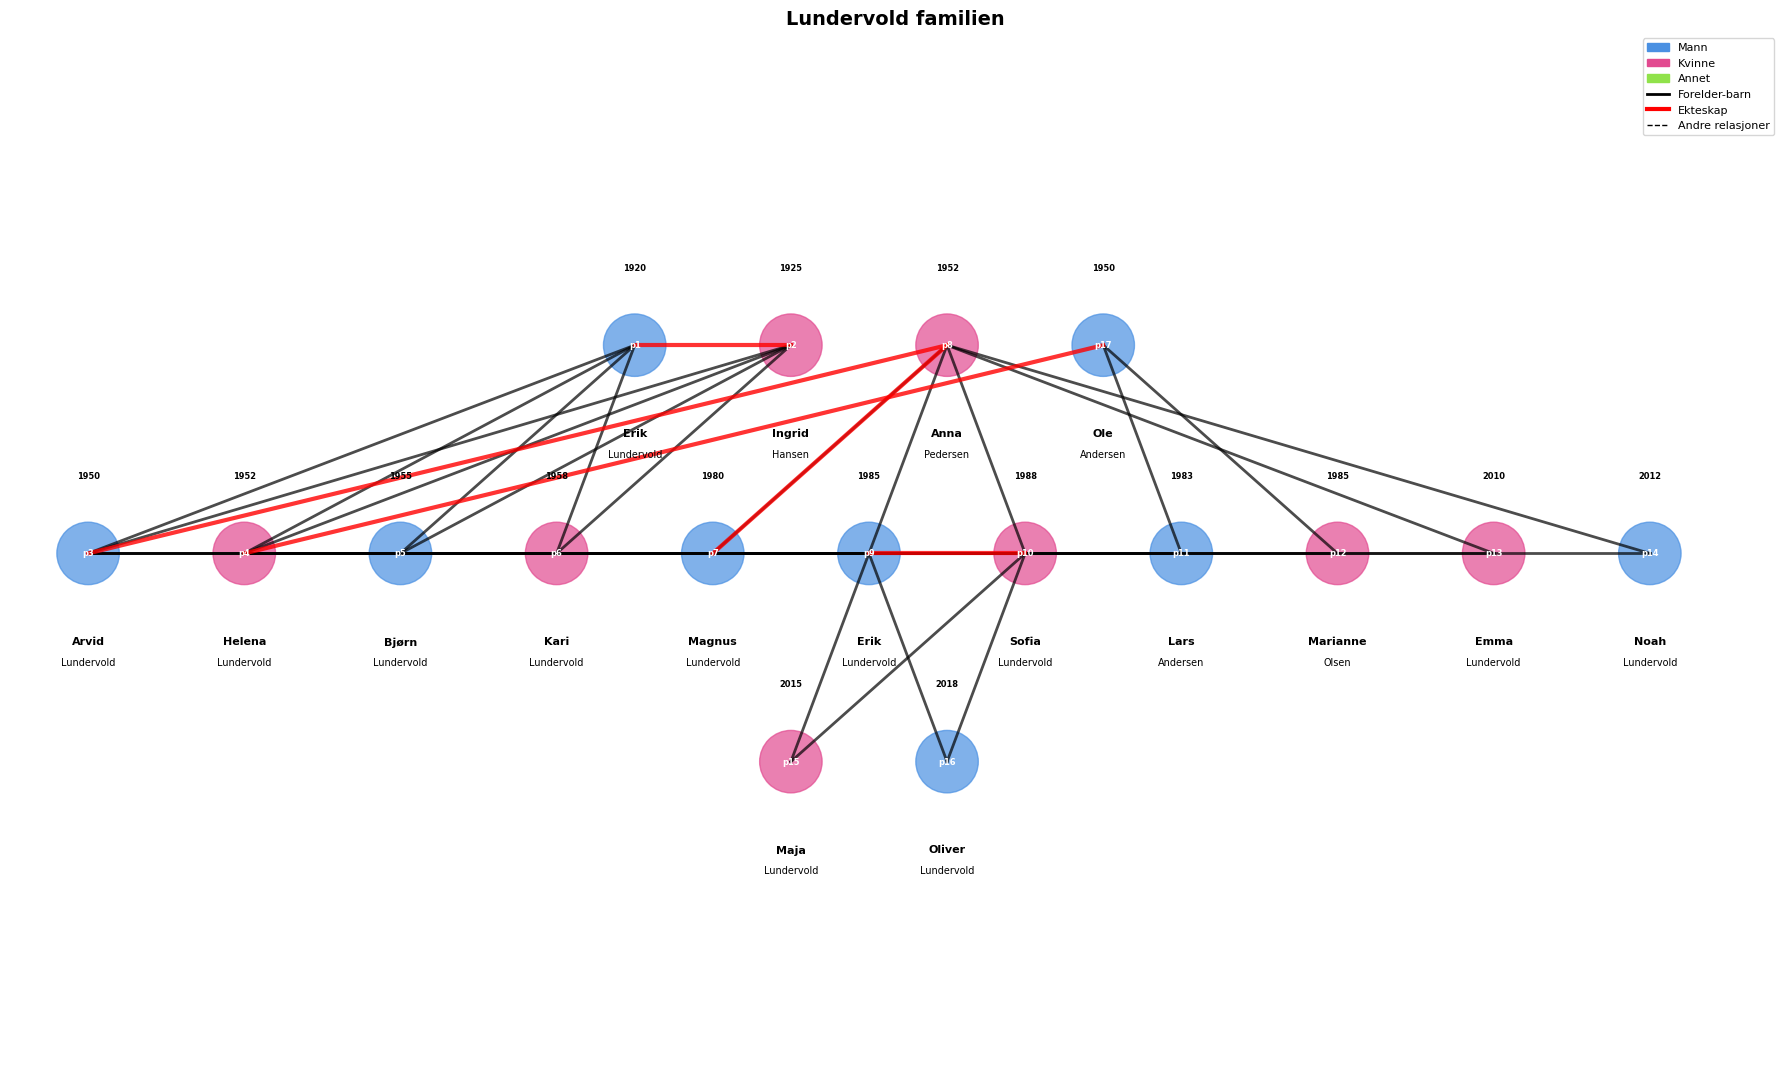

In [6]:
# Test hierarkisk slektstre
fig = plot_hierarchical_tree(slektstre, title="Lundervold familien")
plt.show()
